In [1]:
import os
import pandas as pd
import numpy as np
import zipfile

In [2]:
data_path = f"Data"
raw_data = os.path.join(data_path, f"Raw Data")
preprocess_path = os.path.join(data_path, f"Preprocessed Data")

In [3]:
merged_aqi_pops = pd.read_csv(os.path.join(preprocess_path, "merged_aqi_county.csv"), encoding = "ISO-8859-1")

In [4]:
mobility_trends = pd.read_csv(os.path.join(raw_data, "Mobility_Trends_County_Modeling_Dataset.csv"), encoding = "ISO-8859-1")

### Mobility Trends

The Mobility Trends County Modeling dataset consists of the accumulation of the three performance metrics: VMT, GHG, and TMS, alongside each of the trend indicators: GDP, Population, Lane Miles, Unemployment Rate, Charging Stations, Telework, Unlinked Passenger Trips, E-commerce, Population Density, and on-demand service revenue. The goal of Mobility Trends and Future Demand research project is to enhance FHWA’s empirical understanding of the impact of trends on travel behavior and transportation demand, and ultimately system performance and the user experience. At the core of this research project is the identification and analysis of trends to support a variety of modeling, forecasting, and ‘what if’ projections to support policy and decision making.

VMT = Vehicle Miles Traveled

GHG = Greenhouse gas emissions from transportation

TMS = Transportation Management System

#### Analysis Plan

- To join on year, state code, county code (only common years 2018 - 2020)

- Possible Interesting attributes -> vmt, vmt_per_person, tms, total_emissions, pop_density, warehouse_emply, courier_emply

- However, we choose VMT for this analysis due to insufficient metadata for the other attributes

In [5]:
mobility_trends.head()

,full_fips_code,year,state_code,county_code,fipsyear,vmt,population,total_emissions,true_gdp,unemployment_rate,...,capital_transit_funding,vmt_log_predictions,vmt_predictions,logvmt,total_emissions_log_predictions,total_emissions_predictions,logtotal_emissions,transit_user_count_log_predictions,transit_user_count_predictions,logtransit_user_count
0,1001,2000,1,1,01001-2000,274449272.4,44021.0,NaN,NaN,0.041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,2001,1,1,01001-2001,294383486.5,44889.0,NaN,949800.0,0.041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,2002,1,1,01001-2002,302790677.5,45909.0,NaN,984039.0,0.048,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,2003,1,1,01001-2003,308238612.8,46800.0,NaN,1008032.0,0.050,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,2004,1,1,01001-2004,321675555.3,48366.0,NaN,1170278.0,0.047,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mobility_trends.columns

Index(['full_fips_code', 'year', 'state_code', 'county_code', 'fipsyear',
       'vmt', 'population', 'total_emissions', 'true_gdp', 'unemployment_rate',
       'charging_stations', 'lnmiles', 'tms', 'telework', 'aland_sqmi',
       'warehouse_emply', 'courier_emply', 'courier_wages',
       'courier_nonemp_estab', 'courier_nonemp_rcptot', 'cpi',
       'courier_nonemp_rcptot_real', 'driver_nonemp_estab',
       'driver_nonemp_rcptot', 'driver_nonemp_rcptot_real', 'pop_density',
       'upt_distr_commuters', 'transit_user_count', 'vmt_per_person',
       'gdp_per_person', 'charging_stations_per_person', 'lnmiles_per_person',
       'upt_per_person', 'county_type', 'internet_connections', 'unemployed',
       'labor_force', 'teleworkers', 'capital_transit_funding',
       'vmt_log_predictions', 'vmt_predictions', 'logvmt',
       'total_emissions_log_predictions', 'total_emissions_predictions',
       'logtotal_emissions', 'transit_user_count_log_predictions',
       'transit_user_count

In [7]:
print(mobility_trends.shape)
print(merged_aqi_pops.shape)

(62027, 48)
(127, 27)


In [8]:
# Renaming columns in mobility_trends to match merged_aqi_pops 
mobility_trends = mobility_trends.rename(columns={
    'state_code': 'State Code',
    'county_code': 'County Code',
    'year': 'Year'
})

# Merging the dataframes on State code, County code, and Year
merged_df = pd.merge(merged_aqi_pops, mobility_trends, on=['State Code', 'County Code', 'Year'])

# Selecting the required columns
final_columns = ['State', 'County', 'Year', 'RUCC', 'Max AQI', 'Median AQI', 'vmt', 'vmt_per_person', 'tms', 'Population','population','logtotal_emissions','warehouse_emply','total_emissions_predictions',
                 'total_emissions', 'pop_density', 'warehouse_emply', 'courier_emply']
merged_mobility = merged_df[final_columns]

In [9]:
merged_mobility.head()

,State,County,Year,RUCC,Max AQI,Median AQI,vmt,vmt_per_person,tms,Population,population,logtotal_emissions,warehouse_emply,total_emissions_predictions,total_emissions,pop_density,warehouse_emply,courier_emply
0,California,Glenn,2018,6.0,230,36,3.408855e+08,12188.848270,0.006652,27899,27967.0,NaN,NaN,NaN,NaN,21.284384,NaN,NaN
1,California,Humboldt,2018,5.0,163,34,7.830646e+08,5747.516393,0.025433,136502,136244.0,NaN,28.0,NaN,NaN,38.183116,28.0,164.0
2,California,Imperial,2018,3.0,286,62,1.321892e+09,7282.227112,0.016141,181062,181523.0,NaN,289.0,NaN,NaN,43.462115,289.0,NaN
3,California,Kern,2018,2.0,190,84,3.103589e+09,3472.516103,0.009679,893618,893758.0,NaN,4068.0,NaN,NaN,109.902782,4068.0,781.0
4,California,Lake,2018,4.0,208,33,2.098837e+08,3263.268661,0.000847,64394,64317.0,NaN,NaN,NaN,NaN,51.186733,NaN,42.0


In [10]:
merged_mobility.to_csv(os.path.join(preprocess_path, "merged_pop_mobility.csv"), index=False)

### RUCC-wise Correlation between VMT and Max AQI Per Year 

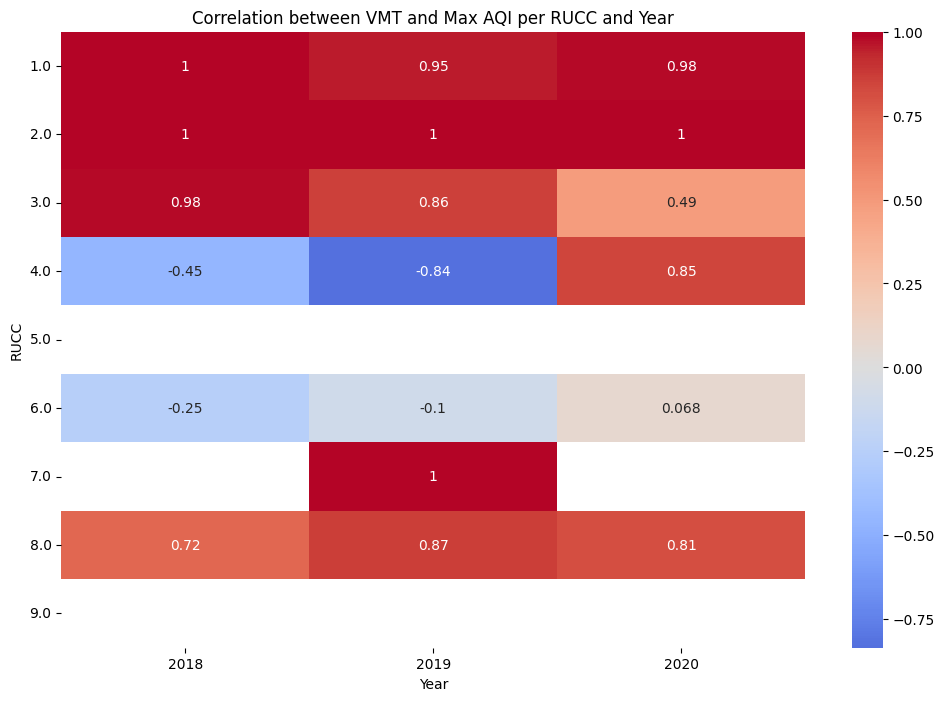

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Including RUCC in the filtered data
relevant_columns = ['State', 'Year', 'Population', 'Max AQI', 'RUCC', 'vmt']
data_filtered = merged_mobility[relevant_columns]

# Excluding RUCC 5 and 9 from the filtered data
data_filtered = data_filtered[~data_filtered['RUCC'].isin(['5.0', '9.0'])]

# Grouping by RUCC and Year, and then calculating the correlation between industrial activity (vmt here) and Max AQI
correlation_data_rucc = data_filtered.groupby(['RUCC', 'Year']).corr().reset_index()

# Extracting only the correlations of interest
correlation_data_rucc = correlation_data_rucc[correlation_data_rucc['level_2'] == 'vmt'][['RUCC', 'Year', 'Max AQI']]

# Pivoting the dataframe for heatmap
heatmap_data_rucc = correlation_data_rucc.pivot("RUCC", "Year", "Max AQI")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_rucc, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation between VMT and Max AQI per RUCC and Year')
plt.yticks(rotation=0)
plt.show()

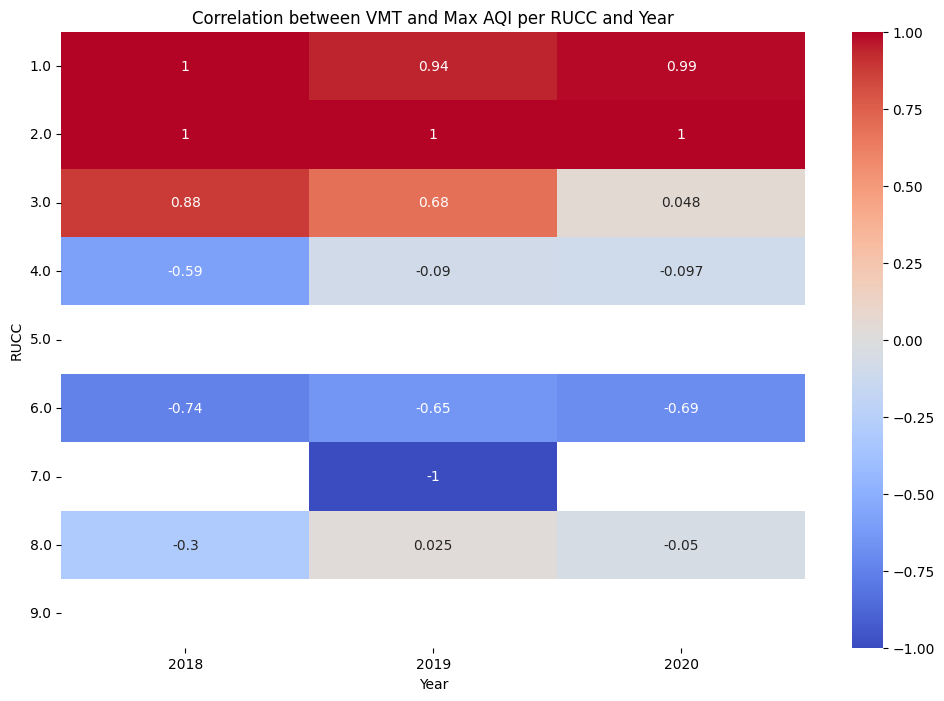

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Including RUCC in the filtered data
relevant_columns = ['State', 'Year', 'Population', 'Max AQI', 'RUCC', 'vmt']
data_filtered = merged_mobility[relevant_columns]

# Excluding RUCC 5 and 9 from the filtered data
# data_filtered = data_filtered[~data_filtered['RUCC'].isin(['5.0', '9.0'])]

# Grouping by RUCC and Year, and then calculating the correlation between industrial activity (vmt here) and Max AQI
correlation_data_rucc = data_filtered.groupby(['RUCC', 'Year']).corr().reset_index()

# Extracting only the correlations of interest
correlation_data_rucc = correlation_data_rucc[correlation_data_rucc['level_2'] == 'Population'][['RUCC', 'Year', 'Max AQI']]

# Pivoting the dataframe for heatmap
heatmap_data_rucc = correlation_data_rucc.pivot("RUCC", "Year", "Max AQI")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_rucc, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation between VMT and Max AQI per RUCC and Year')
plt.yticks(rotation=0)
plt.show()

In [21]:
# Merging the data and renaming the correlation column to VMT_Correlation directly
merged_with_correlation = pd.merge(data_filtered, correlation_data_rucc.rename(columns={'Max AQI': 'VMT_Correlation'}), on=['RUCC', 'Year'], how='left')

In [22]:
merged_with_correlation.head()

,State,Year,Population,Max AQI,RUCC,vmt,VMT_Correlation
0,California,2018,27899,230,6.0,3.408855e+08,-0.248453
1,California,2018,136502,163,5.0,7.830646e+08,NaN
2,California,2018,181062,286,3.0,1.321892e+09,0.978729
3,California,2018,893618,190,2.0,3.103589e+09,1.000000
4,California,2018,64394,208,4.0,2.098837e+08,-0.452543


In [24]:
merged_with_correlation.to_csv(os.path.join(preprocess_path, "merged_mobility_with_correlation.csv"), index=False)

### State-wise Correlation between VMT and Max AQI Per Year

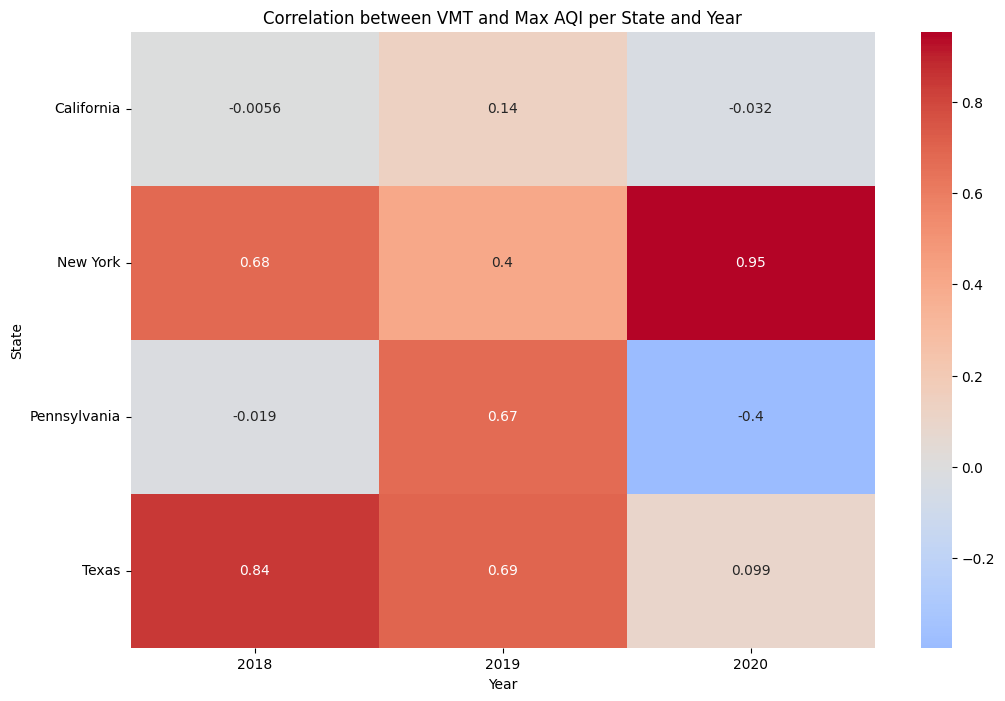

In [12]:
# Grouping by State and Year, and then calculating the correlation between VMT and Max AQI
correlation_data_state = data_filtered.groupby(['State', 'Year']).corr().reset_index()

# Extracting only the correlations of interest
correlation_data_state = correlation_data_state[correlation_data_state['level_2'] == 'vmt'][['State', 'Year', 'Max AQI']]

# Removing Nebraska from the analysis
correlation_data_state = correlation_data_state[correlation_data_state['State'] != 'Nebraska']

# Pivoting the dataframe for heatmap
heatmap_data_state = correlation_data_state.pivot("State", "Year", "Max AQI")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_state, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation between VMT and Max AQI per State and Year')
plt.yticks(rotation=0)
plt.show()

#### To do:

The same can be repeated for the other interesting attributes too (tms, total_emissions, etc). 

To check the second sub-question 

- we need to find a way to see if industrial activity and the population density in a region has an influence on the quality of air.

### Sub-question

#### Checking if industrial activity and the population density in a region has an influence on the quality of air.

#### 1. Vehicle Miles Traveled

In [13]:
# Summary statistics for Max AQI, population, and vmt (metric for Industrial Activity)
summary_stats = merged_mobility[['Max AQI', 'population', 'vmt']].describe()
summary_stats

,Max AQI,population,vmt
count,64.00000,6.400000e+01,6.400000e+01
mean,144.78125,6.989707e+05,2.830471e+09
std,90.44712,2.161691e+06,8.531090e+09
min,49.00000,4.416000e+03,0.000000e+00
25%,89.25000,4.066525e+04,1.756540e+08
50%,117.50000,6.540550e+04,3.308001e+08
75%,181.25000,1.362482e+05,5.675673e+08
max,548.00000,1.007391e+07,4.092307e+10


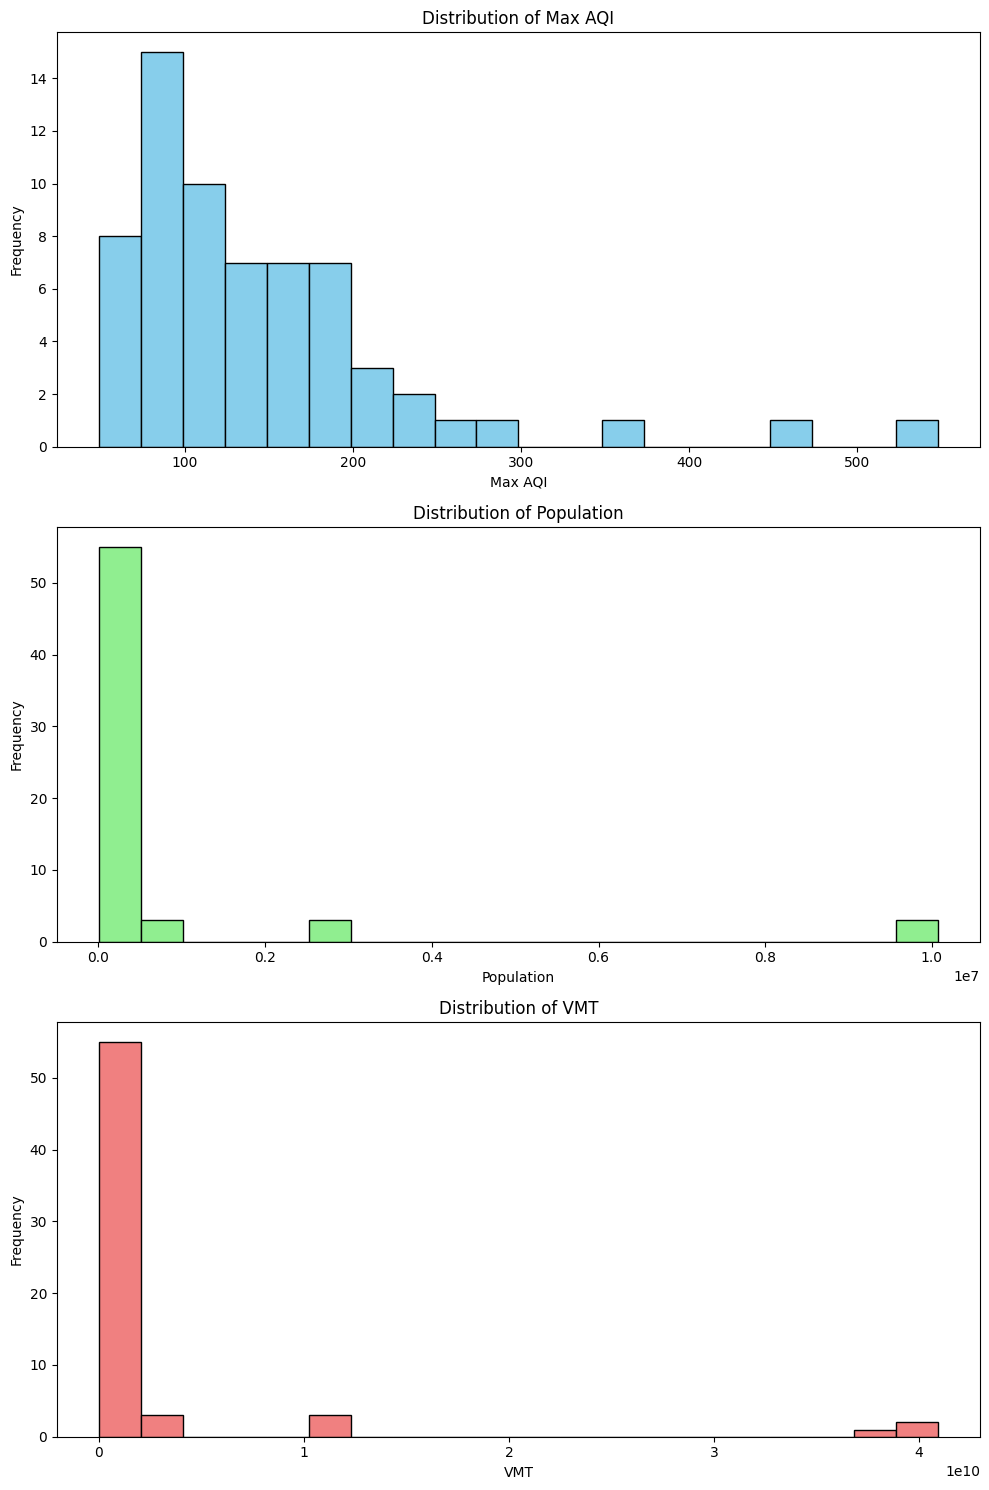

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for Max AQI
axs[0].hist(merged_mobility['Max AQI'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Max AQI')
axs[0].set_xlabel('Max AQI')
axs[0].set_ylabel('Frequency')

# Histogram for Population
axs[1].hist(merged_mobility['population'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Population')
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Frequency')

# Histogram for VMT
axs[2].hist(merged_mobility['vmt'], bins=20, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribution of VMT')
axs[2].set_xlabel('VMT')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Correlation Analysis

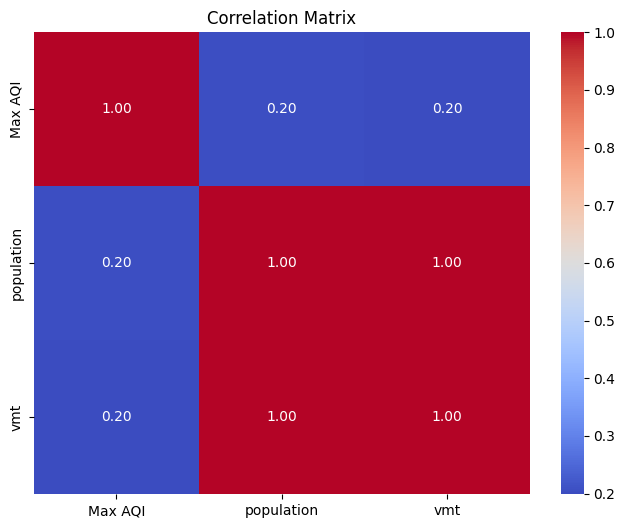

In [15]:
# this correlation is for the years 2018 - 2020 cause those were the common years when merging 

correlation_matrix = merged_mobility[['Max AQI', 'population', 'vmt']].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

#### Insights
This suggests a very strong multicollinearity between population and vmt. Since population and vmt are almost perfectly correlated, we can remove one from the regression model to reduce multicollinearity. However, since the question requires us to analyze the relationship among the 3 attributes, we have chosen to apply Ridge or Lasso regression to handle multicollinearity.

#### Regression Analysis

##### Applying Ridge and Lasso Regression

Ridge and Lasso regression are techniques that can help mitigate the effects of multicollinearity by adding a regularization term to the regression model. Ridge regression (L2 regularization) penalizes the sum of squared coefficients, while Lasso regression (L1 regularization) penalizes the absolute value of the coefficients, potentially setting some coefficients to zero.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables and dependent variable
X = merged_mobility[['population', 'vmt']]
y = merged_mobility['Max AQI']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

ridge_coefficients = ridge.coef_
lasso_coefficients = lasso.coef_

ridge_mse, ridge_r2, lasso_mse, lasso_r2, ridge_coefficients, lasso_coefficients


(2543.576064671714,
 -0.1982682484975653,
 2538.5931147288798,
 -0.19592080122312283,
 array([15.73588759,  4.38683258]),
 array([22.19912327, -1.95357384]))

### Results

Ridge Regression:

    Mean Squared Error (MSE): 2543.58
    R-squared: -0.198
    Coefficients:
        population: 15.74
        vmt: 4.39

Lasso Regression:

    Mean Squared Error (MSE): 2538.59
    R-squared: -0.196
    Coefficients:
        population: 22.20
        vmt: -1.95

### Interpretation:
-   Both models have negative R-squared values, indicating that the models do not fit the data well
-    The MSE values are high, showing significant errors in prediction
-     Ridge regression has retained both coefficients with positive values, while Lasso regression has set the vmt coefficient to a negative value.

### Conclusion

- The models' poor fit suggests that population and vmt alone do not adequately explain the variability in Max AQI.
- 
Additional variables and perhaps non-linear models might be necessary to better understand the relationship betweenvmty, population density, and air quality.

### Region-wise

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

data_clean = merged_mobility.dropna(subset=['vmt'])

# Prepare to store results
states = data_clean['State'].unique()
results = []

# Initialize the scaler
scaler = StandardScaler()

# Loop through each state and perform the regression analysis
for state in states:
    state_data = data_clean[data_clean['State'] == state]
    
    if state_data.shape[0] < 5:
        print(f"Skipping state {state} due to insufficient data points.")
        continue
    
    X_state = state_data[['population', 'vmt']]
    y_state = state_data['Max AQI']
    
    # Standardize the independent variables
    X_state_scaled = scaler.fit_transform(X_state)
    
    # Split the data into training and testing sets
    try:
        X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(X_state_scaled, y_state, test_size=0.2, random_state=42)
        
        # Ensure the test set is not empty and has variance
        if len(X_test_state) == 0 or len(y_test_state) == 0:
            print(f"Skipping state {state} due to empty test set.")
            continue
        if y_test_state.var() == 0:
            print(f"Skipping state {state} due to no variance in target variable in the test set.")
            continue
        
        # Fit Ridge regression model
        ridge_state = Ridge(alpha=1.0)
        ridge_state.fit(X_train_state, y_train_state)
        y_pred_ridge_state = ridge_state.predict(X_test_state)
        
        # Fit Lasso regression model
        lasso_state = Lasso(alpha=0.1)
        
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            lasso_state.fit(X_train_state, y_train_state)
        
        y_pred_lasso_state = lasso_state.predict(X_test_state)
        
        # Evaluate the models
        ridge_mse_state = mean_squared_error(y_test_state, y_pred_ridge_state)
        ridge_r2_state = r2_score(y_test_state, y_pred_ridge_state)
        
        lasso_mse_state = mean_squared_error(y_test_state, y_pred_lasso_state)
        lasso_r2_state = r2_score(y_test_state, y_pred_lasso_state)
        
        # Store the results
        results.append({
            'State': state,
            'Ridge_MSE': ridge_mse_state,
            'Ridge_R2': ridge_r2_state,
            'Lasso_MSE': lasso_mse_state,
            'Lasso_R2': lasso_r2_state,
            'Ridge_Coefficients': ridge_state.coef_,
            'Lasso_Coefficients': lasso_state.coef_
        })
    except ValueError as e:
        print(f"Error processing state {state}: {e}")
        results.append({
            'State': state,
            'Ridge_MSE': float('nan'),
            'Ridge_R2': float('nan'),
            'Lasso_MSE': float('nan'),
            'Lasso_R2': float('nan'),
            'Ridge_Coefficients': [float('nan'), float('nan')],
            'Lasso_Coefficients': [float('nan'), float('nan')]
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df.head(10))


Skipping state Nebraska due to insufficient data points.
          State    Ridge_MSE  Ridge_R2    Lasso_MSE  Lasso_R2  \
0    California  8076.656577 -0.380199  7835.516415 -0.338991   
1      New York   560.044669 -0.211562   614.041044 -0.328374   
2  Pennsylvania  1009.207380 -0.126068  1061.149504 -0.184025   
3         Texas   338.890232 -0.244776   325.947785 -0.197237   

                         Ridge_Coefficients  \
0   [10.941363472213778, -9.83845850938031]   
1  [-2.427679965234661, 11.392748404531329]   
2   [14.78438602753936, -8.542473856320202]   
3    [4.069258508902237, 5.848759016353379]   

                          Lasso_Coefficients  
0     [256.968930118749, -255.7967394088929]  
1   [-12.572617854057713, 22.61876043291955]  
2  [20.181622954278026, -13.133009310272957]  
3   [-15.194080186602017, 25.78864232830288]  


#### Interpretation

California:

    Ridge Regression:
        Ridge_MSE: 8076.66 (high value indicates poor fit)
        Ridge_R2: -0.380 (negative R-squared indicates a poor model fit)
        Coefficients: population = 10.94, vmt = -9.84
    Lasso Regression:
        Lasso_MSE: 7835.52 (slightly better than Ridge, but still indicates poor fit)
        Lasso_R2: -0.339 (negative R-squared indicates a poor model fit)
        Coefficients: population = 256.97, vmt = -255.80

Interpretation:

    Both Ridge and Lasso models have poor fits for California (R2 is negative and MSE is high).
    In Ridge regression, population has a positive relationship and vmt has a negative relationship with Max AQI.
    In Lasso regression, the coefficients for population and vmt are much larger, indicating that Lasso is heavily penalizing these coefficients.

New York:

    Ridge Regression:
        Ridge_MSE: 560.04
        Ridge_R2: -0.212 (negative R-squared indicates poor fit)
        Coefficients: population = -2.43, vmt = 11.39
    Lasso Regression:
        Lasso_MSE: 614.04
        Lasso_R2: -0.328 (negative R-squared indicates poor fit)
        Coefficients: population = -12.57, vmt = 22.62

Interpretation:

    Both models show poor fits with negative R-squared values.
    In both models, population has a negative relationship, and vmt has a positive relationship with Max AQI.

Pennsylvania:

    Ridge Regression:
        Ridge_MSE: 1009.21
        Ridge_R2: -0.126
        Coefficients: population = 14.78, vmt = -8.54
    Lasso Regression:
        Lasso_MSE: 1061.15
        Lasso_R2: -0.184
        Coefficients: population = 20.18, vmt = -13.13

Interpretation:

    Both models have poor fits with negative R-squared values.
    population has a positive relationship, and vmt has a negative relationship with Max AQI in both models.

Texas:

    Ridge Regression:
        Ridge_MSE: 338.89
        Ridge_R2: -0.245
        Coefficients: population = 4.07, vmt = 5.85
    Lasso Regression:
        Lasso_MSE: 325.95
        Lasso_R2: -0.197
        Coefficients: population = -15.19, vmt = 25.79

Interpretation:

    Both models show poor fits with negative R-squared values.
    In Ridge regression, both population and vmt have a positive relationship with Max AQI.
    In Lasso regression, population has a negative relationship and vmt has a strong positive relationship with Max AQI.